In [1]:
import tifffile as tf
import cv2
import os
import glob
import json
import pylab as pl

In [2]:
%matplotlib notebook

In [3]:
rootdir = '/n/coxfs01/2p-data'
animalid = 'JC084'
session = '20190522'
fov = 'FOV1_zoom2p0x'
channel_id = 2
fmt = 'tif'

anat_fpath = glob.glob(os.path.join(rootdir, animalid, session, fov, 'anatomical', \
                                    'anatomical_Channel%02d*.%s' % (channel_id, fmt)))[0]
anat_fpath

'/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/anatomical/anatomical_Channel02_transformed.tif'

In [4]:
if fmt=='tif':
    img = tf.imread(anat_fpath)
else:
    img = cv2.imread(anat_fpath)

print(img.dtype, img.min(), img.max())
print(img.shape)


(dtype('uint8'), 1, 255)
(512, 512)


In [5]:
if len(img.shape)>2:
    img = img[:, :, 0]
img.shape

(512, 512)

In [6]:
print("top2bottom:", 0.302*8.0)
print("left2right", 0.289*8.0)



('top2bottom:', 2.416)
('left2right', 2.312)


In [7]:
# Use measured pixel size from PSF (20191005, most recent)
# ------------------------------------------------------------------
xaxis_conversion = 2.3 #2.31  # size of x-axis pixel, goes with A-P axis
yaxis_conversion = 1.9 ##1.89  # size of y-axis pixels, goes with M-L axis

In [8]:
d1, d2 = img.shape # (im_h, im_w)
new_d1 = int(round(d1*xaxis_conversion, 1)) # after transform, 
new_d2 = int(round(d2*yaxis_conversion, 1)) # after transform, d2~ML axis (width), 
zimg_r = cv2.resize(img, (new_d2, new_d1))   # (new_d1~COLS, new_d2~ROWS)
print(zimg_r.shape)
print(new_d1, new_d2)

(1177, 972)
(1177, 972)


<IPython.core.display.Javascript object>


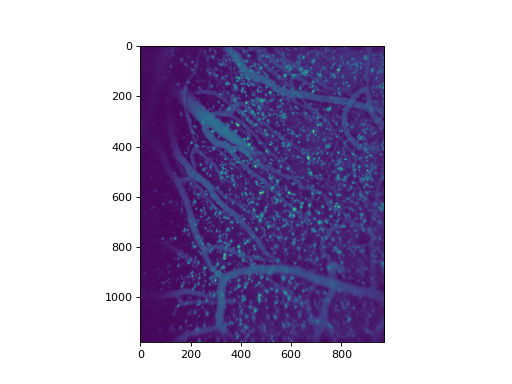

In [9]:
pl.figure()
pl.imshow(zimg_r)

# save

In [11]:
img_outpath = '%s_transformed_scaled2.%s' % (os.path.splitext(anat_fpath)[0], fmt)

if fmt=='tif':
    tf.imsave(img_outpath, zimg_r)
else:
    cv2.imwrite(img_outpath, zimg_r)


In [12]:
print(img_outpath)

/n/coxfs01/2p-data/JC084/20190522/FOV1_zoom2p0x/anatomical/anatomical_Channel02_transformed_transformed_scaled2.tif
